## Boston House Prices Dataset - An Investigation

### Introduction

The Boston Housing Data consists of information collected by the US Census Service on housing in the Boston, Massachusetts area in 1970 and contains [506 entries with 13 distinct categories](https://www.kaggle.com/c/boston-housing) of numerical data. After doing some [background reading](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155as) about the data set I discovered that it is included in [SciKit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html), the Python machine learning library, and can therefore be easily imported into this notebook to anaylse. 

In [1]:
#Importing dataset
from sklearn.datasets import load_boston ##https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
boston = load_boston()

#import the other libraries and packages required to analyse the dataset
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as ss
import pandas as pd
%matplotlib inline
import keras as kr

Using TensorFlow backend.


To take a first look at the data set we can use the below commands to ascertain the categories it holds and the characteristics of the data. 

In [2]:
print (boston.keys()) #https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
print (boston.DESCR) #https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

From the above detail it is made clear that there is a 14th "target" variable named **MEDV**, which is the "median value of owner-occupied homes in $1,000's".  The information listed above also verifies that there is no missing data in any of the attribute fields, which means that the data doesn't need to cleaned before any exploratory analysis can be performed, but to be certain, loading the data to a Pandas dataframe and using the **isnull()** function will confirm that - 

In [4]:
#load Boston dataset into Pandas dataframe https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
df = pd.DataFrame(boston.data, columns=boston.feature_names)
#http://www.neural.cz/dataset-exploration-boston-house-pricing.html
pd.isnull(df).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

### Descriptive analysis
Descriptive statistics give a simple summary of a data set, and include such observations as the count, [standard deviation, minimum, maximum and mean](https://en.wikipedia.org/wiki/Descriptive_statistics) for example. This type of statistics doesn't make any assumptions about the data, rather it is a method by which to synopsise and describe it.  One way of finding out these sorts of observations about the Boston dataset is by using the Pandas [describe function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html). With this function it is possible to summarise all columns and calculate some of these statistics - 

In [5]:
#summarise dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


All of the so-called [13 "feature" attributes](https://www.kaggle.com/shreayan98c/boston-house-price-prediction) have been automatically included in the above dataframe. In order to understand the MEDV variable it is necessary to generate it as the "target" value add it as a new column to the dataframe. 

In [6]:
#code borrowed from https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
df["MEDV"] = boston.target #defines the MEDV column of the dataframe
X = df.drop("MEDV",1)   #Feature Matrix
y = df["MEDV"]          #Target Variable
df.head()#show first 5 rows of dataframe 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In order to better understand the data and any notable relationships it holds, I decided to utilise [Pandas in-built correlation coefficients](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) function to ascertain what statistical relationships exist between the variables - 

In [7]:
df.corr()#calculates correlation coefficients

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


To make this correlation matrix more accessible I thought it would be useful to plot it using Seaborn's heatmap to graphically represent these relationships, as recommended by [Abhini Shetye in her towardsdatascience.com blogpost - ](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)

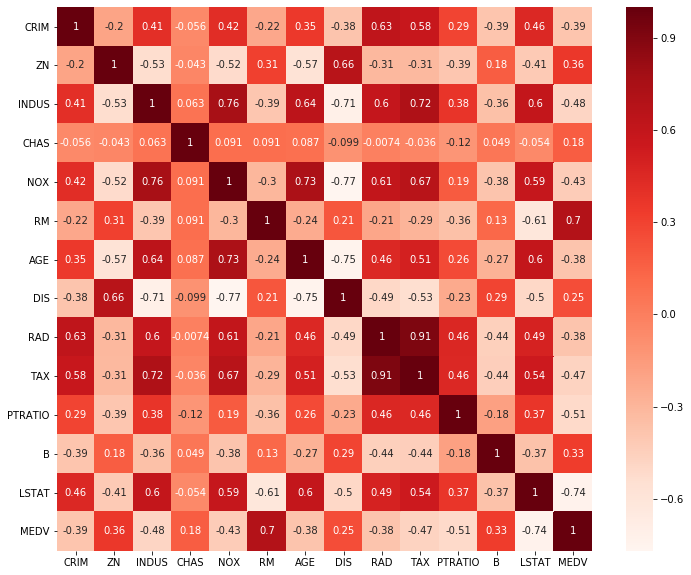

In [8]:
#https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
plt.figure(figsize=(12,10))#sets size of graph
cor = df.corr() #defines variable called cor that consists of correlation coefficients of dataframe
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)#calls Seaborn to graph a heatmap
plt.show()#calls Pyplot to show heatmap

The strongest correlations with the target variable according to the above graph are with "LSTAT" and "RM".

It is possible to also use the [describe function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.describe.html?highlight=descriptive) from scipy.stats to outline some descriptive statistics of the Boston data.  This function computes the size of the data (nobs), the min and max, the kurtosis, the skewness, the mean and the variance of each variable in the data set - 

In [9]:
from scipy.stats.mstats import describe #imports scipy stats package
describe(df)

C:\Users\Aideen and Ken\Anaconda\lib\site-packages\scipy\stats\mstats_basic.py:2300: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  mm = (ma.minimum.reduce(a), ma.maximum.reduce(a))
C:\Users\Aideen and Ken\Anaconda\lib\site-packages\scipy\stats\mstats_basic.py:2300: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  mm = (ma.minimum.reduce(a), ma.maximum.reduce(a))


DescribeResult(nobs=array([506, 506, 506, 506, 506, 506, 506, 506, 506, 506, 506, 506, 506,
       506], dtype=int64), minmax=(masked_array(data=0.,
             mask=False,
       fill_value=1e+20), masked_array(data=711.,
             mask=False,
       fill_value=1e+20)), mean=masked_array(data=[3.61352356e+00, 1.13636364e+01, 1.11367787e+01,
                   6.91699605e-02, 5.54695059e-01, 6.28463439e+00,
                   6.85749012e+01, 3.79504269e+00, 9.54940711e+00,
                   4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
                   1.26530632e+01, 2.25328063e+01],
             mask=False,
       fill_value=1e+20), variance=masked_array(data=[7.38403597e+01, 5.42861840e+02, 4.69714297e+01,
                   6.43854770e-02, 1.34010989e-02, 4.92695216e-01,
                   7.90792473e+02, 4.42525226e+00, 7.56665313e+01,
                   2.83486236e+04, 4.67772630e+00, 8.31828042e+03,
                   5.08939794e+01, 8.44195562e+01],
             mask=F

In order to understand the shape of the distribution of the MEDV variable I figured it would be useful to plot it with a distplot - 

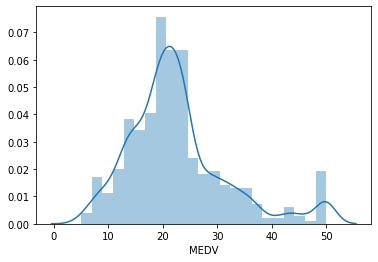

In [10]:
sns.distplot(df['MEDV'])
plt.show()

My interpretation of the above graph is that the median house price has a normal distribution, with some outliers. 

### Inferential Statistics
Inferential statistics differ from descriptive statistics in that rather than summarise the data, they are used to prove, or infer, certain theories about it - for example, [testing a hyopthesis and using a sample of a population to infer a characteristic of that population](https://www.mymarketresearchmethods.com/descriptive-inferential-statistics-difference/). Examples of this kind of statistics are t-tests, regression and ANOVA, all of which I will attempt to explore as part of this project. 

By selecting the 2 relevant columns for the purposes of completing this part of the assignment - CHAS (whether houses are situated along the Charles River or not) and MEDV (the median house prices) - and adding them to their own Pandas dataframe it is possible to begin interpreting any statistical relationship between these variables.  As proximity of houses to the river is denoted in the CHAS column with a "1" and conversely, "0" for those not along the river, I needed to find a method of sorting the data to demonstrate this, and also, the relationship that houses with an entry of "1" have with the median house value.  I found [this blog post](https://towardsdatascience.com/5-minute-guide-to-plotting-with-pandas-e8c0f40a1df4) that details how to create a pivot table with Pandas to calculate the mean value for each category and subsequently plot the results - 

In [11]:
columns = ["CHAS", "MEDV"]#declare a variable called columns containing the 2 relevant variables
df1 = pd.DataFrame(df, columns=columns)#create a new dataframe of just these 2 columns 
#below code borrowed from https://towardsdatascience.com/5-minute-guide-to-plotting-with-pandas-e8c0f40a1df4
pivot = pd.pivot_table(df1, values='MEDV', index=['CHAS'])#define pivot table values and index 
pivot #display pivot table

,MEDV
CHAS,
0.0,22.093843
1.0,28.440000


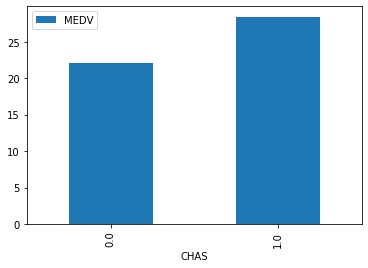

In [12]:
pivot.plot(kind='bar')#plot bar chart of pivot

We can see from the above bar chart that houses that are situated along the river have a higher price than those that are not.
## Linear Regression
Using the [linregress function from scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html?highlight=linear%20regression) it is possible to calcuate the linear least squares regression for the 2 variables, and in turn, plot the findings.  

1    0.0
Name: CHAS, dtype: float64
slope: 6.346157    intercept: 22.093843


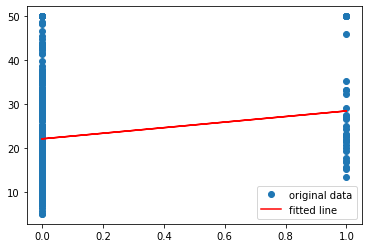

In [20]:
x = df['CHAS']#independent variable
y = df['MEDV']#dependent variable
z = x.loc['1':'1']#trying to isolate 1s in CHAS variable
print(z)
# Get slope, intercept from linregress() to plot y' = intercept + slope*x
slope, intercept, r_value, p_value, std_err = ss.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
#plot the data
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

It's clear from the above graph that a linear relationship does not exist between these variables, which confirms that the ["change in one entity does not correspond with constant change in the other entity"](https://sciencing.com/non-linear-relationship-10003107.html).  From this we can infer that there is
## Independent T-test
As CHAS is a [dichotomous variable](https://statistics.laerd.com/statistical-guides/types-of-variable.php) it may be the case that an [independent t-test](https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php) could be a better indicator of any statistical significance between these variables.  This test is used to test [for a significant difference between the mean of two independent (unrelated) groups](https://pythonfordatascience.org/independent-t-test-python/) and proposes the null hypothesis that the mean of sample 1 is equal to the mean of sample 2. 


In [14]:
ss.ttest_ind(df1['CHAS'], df1['MEDV'])

Ttest_indResult(statistic=-54.9210289745203, pvalue=1.4651540072350996e-305)

## Predicting 

In [15]:
#https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
dataset = df.values
X = dataset[:,0:13]
Y = dataset[:,13]
# define the model
def larger_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))


Larger: -22.83 (23.40) MSE


### References
1. https://www.kaggle.com/c/boston-housing
2. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
3. https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
4. http://www.neural.cz/dataset-exploration-boston-house-pricing.html
5. https://en.wikipedia.org/wiki/Descriptive_statistics 
6. https://www.kaggle.com/shreayan98c/boston-house-price-prediction
7. https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
8. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
9. https://www.mymarketresearchmethods.com/descriptive-inferential-statistics-difference/
10. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html?highlight=linear%20regression
11. https://sciencing.com/non-linear-relationship-10003107.html
12. https://statistics.laerd.com/statistical-guides/types-of-variable.php
13. https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php
14. https://pythonfordatascience.org/independent-t-test-python/